# **Détection de visages à partir d'une image ou d'une vidéo (stream)**
---
---
La détection des visages consiste à identifier le visage d'une personne dans une image ou une vidéo. Ainsi, il faudra analyser le contenu visuel afin de déterminer si les caractéristiques d'un visage d'une personne sont présents ou pas.

Les visages humains sont très variés (personnes d'origines, de sexes et de cultures différents). Les apporoches ML supervisées de détection des visages doivent être entraînés sur de larges quantités de données d'entrée pour pouvoir se généraliser sur de nouvelles données.

D'autre part, les approches proposées doivent être robustes aux différents types d'éclairage, aux transformations géométriques, etc.  Par conséquent, on augmente souvent les datasets d'apprentissage par des données vérifiant ces hypothèses.

Dans le cadre de TP, nous allons utiliser une implémentation OpenCV de la méthode de cascade de Haar qui est un modèle supervisé pré-entrainé.

**Méthode de casacde de Haar**

---



Cette méthode a été intrduite par Paul Viola et M.ichael Jones en 2001, [www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf](www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf) [1].
L'idée principale de cette méthode consiste à utiliser une cascade de classificateurs pour détecter les différentes caractéristiques d'une image. Ces classificateurs sont ensuite combinés en un classificateur fort capable de distinguer avec précision les échantillons contenant un visage humain de ceux qui n'en contiennent pas.

Le classificateur Haar Cascade implémenté dans OpenCV est pré-entrainé sur un large ensemble de données de visages humains. Ainsi, il n'est pas nécessaire de le re-entrainer. Il suffit de charger le classificateur à partir de la bibliothèque et de l'utiliser pour détecter les visages sur une image d'entrée.



**Référence**
[1] P. Viola and M. Jones, "Rapid object detection using a boosted cascade of simple features," Proceedings of the 2001 IEEE Computer Society Conference on Computer Vision and Pattern Recognition. CVPR 2001, Kauai, HI, USA, 2001, pp. I-I, doi: 10.1109/CVPR.2001.990517.

## ***Question 1- Lire une image contenant un visage***

## Importer les librairies
OpenCV, Numpy, Matplotlib

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


## Charger et afficher l'image
Soit l'image visage.jpg (dans le fichier ci-joint). Lire et afficher cette image. Vérifier les dimensions de l'image

Dimensions de l'image : (683, 1024, 3)


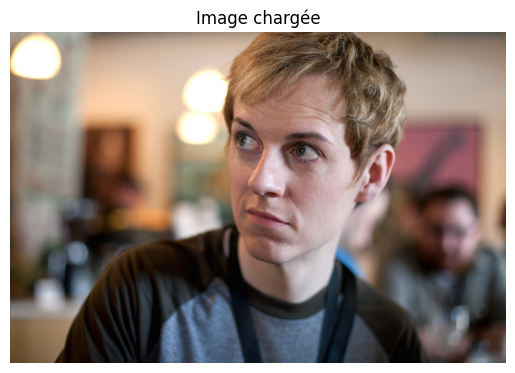

In [3]:
# Lire et afficher l'image
ImNom = "visage.jpg"
img = cv2.imread(ImNom)

# Vérifier si l'image est bien chargée
if img is None:
    print("Erreur : image non trouvée.")
else:
    print("Dimensions de l'image :", img.shape)
    # Convertir BGR vers RGB pour affichage avec matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title("Image chargée")
    plt.show()

## Convertir l'image en niveaux de gris

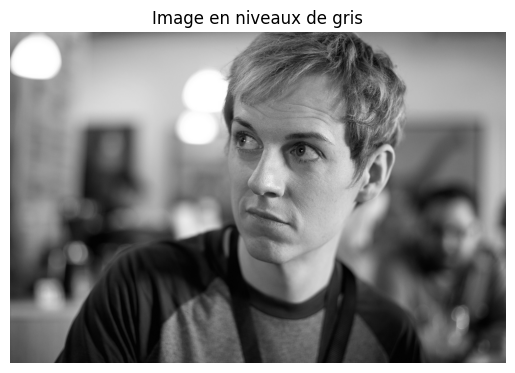

In [5]:
# Convertir l'image en niveaux de gris
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Afficher l'image en niveaux de gris
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.title("Image en niveaux de gris")
plt.show()


## Instancier et charger le classifieur CascadeClassifier
Pour plus d'informations vous pouvez regarder [OpenCv CascadeClassifier](https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html)

In [6]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

## Appliquer le classifieur

In [7]:
face = face_classifier.detectMultiScale(
    img_gray, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

## Dessiner une boite englobante

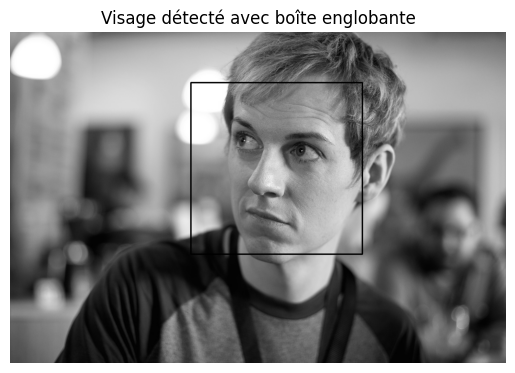

In [10]:
# Dessiner les boîtes englobantes
for (x, y, w, h) in face:
    cv2.rectangle(img_gray, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Afficher le résultat
img_with_box = cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB)
plt.imshow(img_with_box)
plt.axis('off')
plt.title("Visage détecté avec boîte englobante")
plt.show()

ReConvertir l'image ---> Image couleur et afficher l'image

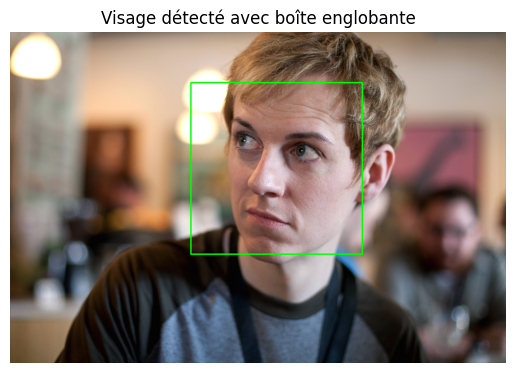

In [11]:
for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Afficher le résultat
img_with_box = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_with_box)
plt.axis('off')
plt.title("Visage détecté avec boîte englobante")
plt.show()

## Lire à partir de la WebCam
Ecrire un programme permettant de détecter directement un visage à partir du flux WebCam et d'encadrer le visage si trouvé.
Vous pouvez utiliser
1.   cv2.VideoCapture(0) : capture de la vidéo / entrée WebCam
2.   Réaliser une boucle : While True : Pour parcourir les frames de la vidéo



In [12]:
#Lire à partir de la WebCam
video_capture = cv2.VideoCapture(0)

In [ ]:
# Lire à partir de la WebCam
video_capture = cv2.VideoCapture(0)

while True:
    ret, frame = video_capture.read()
    if not ret:
        break

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(
        gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
    )

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    cv2.imshow("Détection de visage (WebCam)", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video_capture.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

: 